<h1 style="font-size: 32px; text-align: center;">Introduction to Computer Programming for the Physical Sciences</h1>
<h2 style="font-size: 24px; text-align: center;">Diego Gonzalez Hernandez</h2>
<h3 style="font-size: 24px; text-align: center;">Spring 2025</h2>

## Working on Section Problems

<ul style="list-style: none;">
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Get into groups of 2 or 3, with at least one laptop per group.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Discuss with each other and attempt each problem yourselves first without AI support for 10-15 mins.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;">
</span>Input the problem prompt into the AI chatbox, use its answer to verify your own, or to learn how it should be solved.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;">
</span>For section problems, you can omit most of the commenting and focus on learning coding. For more difficult problems, minimal comments are still recommended as a way of organizing your own thoughts.</li>
  <li style="margin-bottom: 10px; font-size: 20px;"><span style="display: inline-block; width: 10px; height: 10px; border: 2px solid black; margin-right: 10px;"></span>Please abide by the <b><a href="https://github.com/enigma-igm/Phys29/blob/main/using_AI_tools.md">Policy and Guidelines on Using AI Tools</a></b></li>

# Section 7

## Problem 1

In [1]:
import numpy as np
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt

We will introduce the a frequently encountered distribution in physics and also in everyday life, the Poisson Distribution with the discrete probability distribution:
\begin{align}
p(k;\mu) = \frac{\mu^{k}e^{-\mu}}{k!}
\end{align}
This describes the probability of a given number of events, k, occurring in a fixed interval of time, if these events occur with a constant rate, $\mu$, and each occurrence is independent from another. 
For example, according to wikipedia, Earth experiences, on average, 2 impacts large enough to produce craters every one million years. This can be described by a poisson distribution with $\mu=2$ for a one million year interval.

1. The ```scipy.stats``` module has many utitlities for handling statistical distributions. Use [scipy.stats.poisson](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.poisson.html) to obtain the probability distribution (probability mass function; pmf) for encountering k meteors large enough to produce craters over one million years. You can use ```scipy.stats.poisson.pmf(k, mu)``` to obtain the pmf. Then plot this distribution.

2. The dinasaurs lived from 252 to 66 million years ago. Plot the probability distribution and the cumulative probability distribution (```poisson.cdf(k, mu)```) of encountering k crater-producing-meteors during this time. Print out the mean and variance of this distribution via: (1). manually calculating using the definition. (2). using ```poisson.stats(mu)``` that comes with ```scipy```.
<img src="figures/dinosaurs.jpg" alt="dino" width="600">

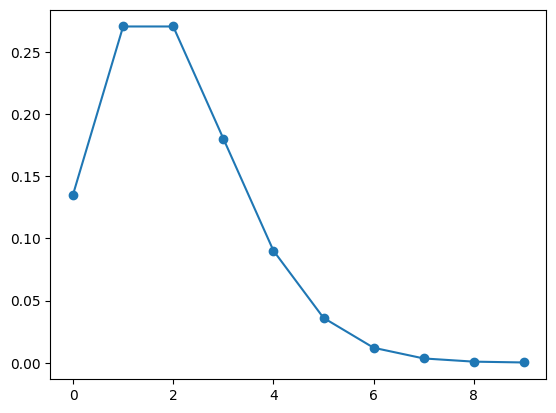

In [2]:
# 1
k = np.arange(10) # Create a range of k values for the number of events
mu = 2 # Set mu = 2 for 2 events expected per 1 myr interval

# Obtain the probability mass function
meteor_pmf = stats.poisson.pmf(k, mu)

# Plot the probability mass function
plt.plot(k, meteor_pmf, '-o')
plt.show()

372


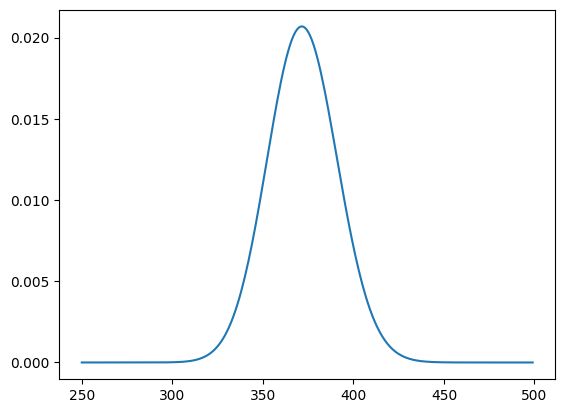

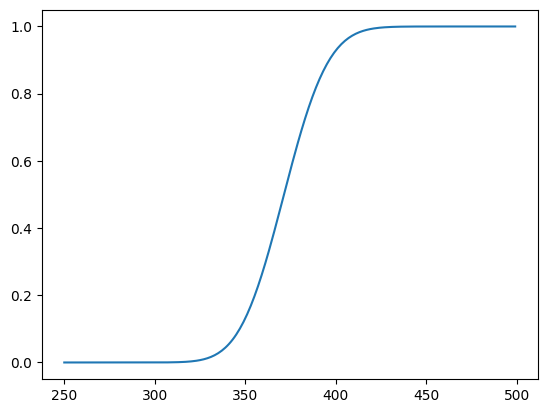

371.99999991657415 371.99999710937715
372.0 372.0


In [3]:
#2 

dino_lifetime = 252-66 # Millions of years

mu_lifetime = dino_lifetime * 2 # Number of events expected over entire lifetime of dinos

print(mu_lifetime) # We expect 372 events, so what range of k values should we probe?

k = np.arange(250,500) # Create a range centered on expected number of events

dino_pmf = stats.poisson.pmf(k,mu_lifetime) # Probability Mass Function
dino_cdf = stats.poisson.cdf(k,mu_lifetime) # Cumulative Distribution Function

# Plot the probability mass function
plt.figure('pmf')
plt.plot(k, dino_pmf)
plt.show()

# Plot the cumulative distribution function
plt.figure('cdf')
plt.plot(k, dino_cdf)
plt.show()

# Manual Method
mean = np.sum(k * dino_pmf) # Note that the pmf is normalized to 1
var  = np.sum((k-mean)**2 * dino_pmf)

print(mean, var)

# Scipy method
mean, var = stats.poisson.stats(mu_lifetime)

print(mean, var)


## Problem 2

In the lecture, it was stated without proof that: 

1. For a random variable $x$, $<Ax>$ = $A<x>$, where A is a constant. i.e. the mean of the random variable $Ax$ is the same as $A$ times the mean of the random variable $x$.

2. For two independent random variables, $x$ and $y$, $<x + y> = <x> + <y>$, and Var($x + y$) = Var($x$) + Var($y$)

In the homework, you will need to prove these analytically. For now, let's verify them numerically. Generate two large samples of two independent variables that follow some probability distributions of your choice (e.g. Uniform, Gaussian), using ```numpy.random.default_rng(seed)```. Verify the two statements above.

In [4]:
# 1

# Initialize a random seed; this lets us obtain the same random numbers each time
seed = 10 # Any number is fine, so long as we use the same one each time
rng = np.random.default_rng(seed) # Create a host of random distributions with the same seed

x = rng.uniform(2, 10, 1000000) # Uniform distribution with low value=2, high value=10

A = 3 # Set some constant A
y = rng.uniform(A*2, A*10, 1000000) # 2nd Uniform distribution with low value=A*2, high value=A*3

xmean = np.mean(x)
ymean = np.mean(y)
print(xmean, ymean, A*xmean) # Compare <x>, <A*x>, A*<x>

5.999752659103981 17.988140139027838 17.99925797731194


5.999752659103981 5.0004451400088445 11.000197799112827 11.000197799112826
5.334990406856496 0.999671764355334 6.33999286248452 6.33466217121183


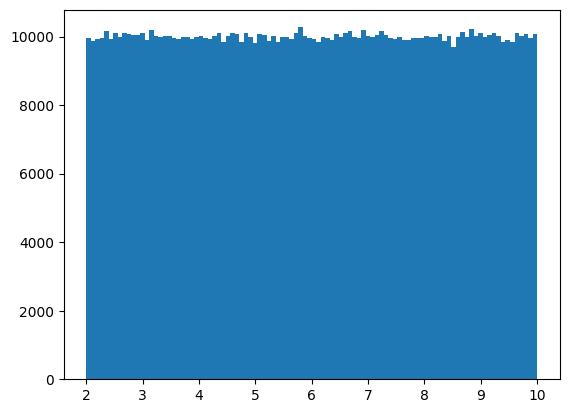

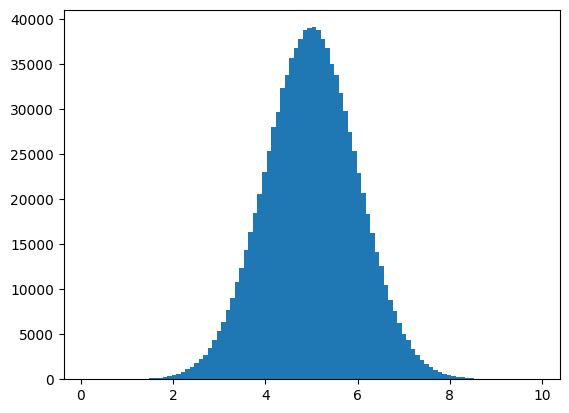

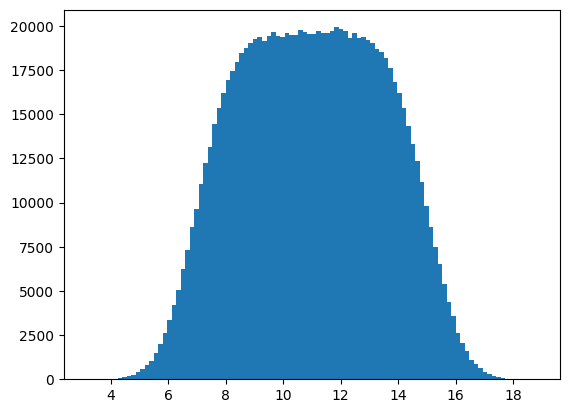

In [5]:
# 2

# Now redefine y to be a gaussian distribution with mean=5, standard deviation=1
y = rng.normal(5, 1, 1000000)

# Add the two seperate distributions' realizations
z = x + y

# Plot the 3 new distributions: uniform, gaussian, uniform+gaussian
plt.figure('x')
plt.hist(x, bins=100)
plt.figure('y')
plt.hist(y, bins=100)
plt.figure('z')
plt.hist(z, bins=100)

ymean = np.mean(y)
zmean = np.mean(z)
xvar = np.var(x)
yvar = np.var(y)
zvar = np.var(z)

# Compare <x>, <y>, <x+y>, <x>+<y>
print(xmean, ymean, zmean, xmean+ymean)
print(xvar, yvar, zvar, xvar+yvar)